<a href="https://colab.research.google.com/github/umbrella0516/CSC1004-python-project/blob/main/HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##HW3##

下载ISLP库

In [1]:
!pip install ISLP

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 23.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.0/522.0 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 25.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 815.2/815.2 kB 27.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 926.4/926.4 kB 23.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.5/94.5 kB 6.2 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=51f5f0437ca3f1cc01920ad2118d188002cd06758bf029f68bb0716494ea9b95
  Stored in directory: /root/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
Successfully built autograd-gamma
  Attempting uni

添加必要的包

In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.base import clone
from functools import partial
from itertools import combinations
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
                      summarize,
                      poly)
from ISLP.models import \
     (Stepwise,
      sklearn_selected,
      sklearn_selection_path)
from statsmodels.genmod.families import Binomial
# from sklearn.model_selection import train_test_split

加载Default dataset

In [3]:
Default = load_data('Default')
Default.columns
# print(Default.shape)
# print(Default.dtypes)
# print(Default.isnull().sum())

# 改变原datatpye,使其可以进行logits回归
Default['default'] = Default['default'].map({'Yes': 1, 'No': 0})
print(Default['default'].unique())

[0, 1]
Categories (2, int64): [0, 1]


#5.6#

In [8]:
# Qa
X = sm.add_constant(Default[['income', 'balance']])
model = sm.GLM(Default['default'], X, family=Binomial())
result = model.fit()
print(result.summary())
print(result.bse)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                default   No. Observations:                10000
Model:                            GLM   Df Residuals:                     9997
Model Family:                Binomial   Df Model:                            2
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -789.48
Date:                Sun, 17 Nov 2024   Deviance:                       1579.0
Time:                        04:04:36   Pearson chi2:                 6.95e+03
No. Iterations:                     9   Pseudo R-squ. (CS):             0.1256
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -11.5405      0.435    -26.544      0.0

In [5]:
# Qb
def boot_fn(model_matrix, response, D, idx):
    D_ = D.loc[idx]
    Y_ = D_[response]
    X_ = clone(model_matrix).fit_transform(D_)
    return sm.GLM(Y_, X_, family=Binomial()).fit().params

In [6]:
# Qc
def boot_SE(func,
       D,
       n=None,
       B=1000,
       seed=0):
   rng = np.random.default_rng(seed)
   first_, second_ = 0, 0
   n = n or D.shape[0]
   for _ in range(B):
       idx = rng.choice(D.index,
                 n,
                 replace=True)
       value = func(D, idx)
       first_ += value
       second_ += value**2
   return np.sqrt(second_ / B - (first_ / B)**2)

Def_func = partial(boot_fn, MS(['income', 'balance']), 'default')
Def_se = boot_SE(Def_func,
          Default,
          B=1000,
          seed=10)
print(Def_se)


# Def_func = partial(boot_fn, MS(['income', 'balance']), 'default')
# rng = np.random.default_rng(0)
# np.array([Def_func(Default,
#           rng.choice(Default.index,
#                      10000,
#                      replace=True)) for _ in range(10)])

intercept    0.425280
income       0.000005
balance      0.000227
dtype: float64


# Qd
The standard errors obtained by using sm.GLM() are income 0.000005 balance 0.000227  
The standard errors obtained by using bootstrap are income 0.000005 balance      0.000227  
These two value obtained by two different method are almost the same.

#6.8#

In [42]:
np.random.seed(42)
# Qa

n = 100
X = np.random.normal(0,1,size=n)
epsilon = np.random.normal(0,1,size=n)


In [43]:
#Qb

beta_0, beta_1, beta_2, beta_3 = 1, 2, 3, 4
Y = beta_0 + beta_1 * X + beta_2 * X**2 + beta_3 * X**3 + epsilon
# print("X:", X)
# print("Y:", Y)

In [44]:
#Qc
import pandas as pd
from sklearn.linear_model import LinearRegression
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

# Create a DataFrame with predictors
data = pd.DataFrame({'X{}'.format(i): X**i for i in range(1, 11)})

# Forward stepwise selection using C_p (equivalent to adjusted R^2 here)
sfs = SFS(LinearRegression(),
          k_features='best',
          forward=True,
          floating=False,
          scoring='r2',
          cv=5)

sfs = sfs.fit(data.values, Y)

selected_features_forward = sfs.k_feature_names_
print(selected_features_forward)
# X_selected = data[selected_features_forward]
# model.fit(X_selected, Y)
# print(model.coef_)

('0', '1', '2')


In [45]:
#Qd
sbs = SFS(LinearRegression(),
          k_features='best',
          forward=False,
          floating=False,
          scoring='r2',
          cv=5)

sbs = sbs.fit(data.values, Y)

selected_features_backward = sbs.k_feature_names_
selected_features_backward

('0', '1', '2')

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.0998603781590646, tolerance: 0.9634479785976513
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.289389887859215, tolerance: 0.9634479785976513
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.217458353250549, tolerance: 0.9634479785976513
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:683: Convergenc

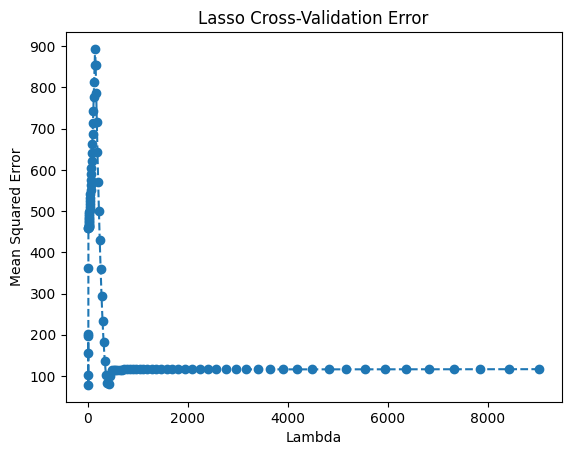

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.42005727, 0.05851647, 0.0035036 , 0.01240429])

In [46]:
#Qe
from sklearn.linear_model import LassoCV
import matplotlib.pyplot as plt

# Fit Lasso model with cross-validation
lasso = LassoCV(cv=5).fit(data.values, Y)

# Plot cross-validation error as a function of lambda
plt.plot(lasso.alphas_, lasso.mse_path_.mean(axis=1), linestyle='--', marker='o')
plt.xlabel('Lambda')
plt.ylabel('Mean Squared Error')
plt.title('Lasso Cross-Validation Error')
plt.show()

# Coefficient estimates
lasso_coef = lasso.coef_
lasso_coef

In [47]:
#Qf
# Generate response for new model
beta_7 = 1
Y_new = beta_0 + beta_7 * X**7 + epsilon

# Forward stepwise selection
sfs_new = SFS(LinearRegression(),
              k_features='best',
              forward=True,
              floating=False,
              scoring='r2',
              cv=5)

sfs_new = sfs_new.fit(data.values, Y_new)

selected_features_forward_new = sfs_new.k_feature_names_
selected_features_forward_new

# Lasso model
lasso_new = LassoCV(cv=5).fit(data.values, Y_new)

# Coefficient estimates
lasso_coef_new = lasso_new.coef_
lasso_coef_new

array([ 0.        , -0.        ,  0.        , -0.        ,  0.        ,
       -0.        ,  0.        , -0.        ,  0.12986302, -0.00608136])